# Real or Not? NLP with Disaster Tweets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

In [2]:
train = pd.read_csv("./dataset/train.csv").fillna('')

train

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


In [3]:
test = pd.read_csv("./dataset/test.csv").fillna('')

test

,id,keyword,location,text
0,0,,,Just happened a terrible car crash
1,2,,,"Heard about #earthquake is different cities, s..."
2,3,,,"there is a forest fire at spot pond, geese are..."
3,9,,,Apocalypse lighting. #Spokane #wildfires
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,,,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,,,Storm in RI worse than last hurricane. My city...
3260,10868,,,Green Line derailment in Chicago http://t.co/U...
3261,10874,,,MEG issues Hazardous Weather Outlook (HWO) htt...


### Overview

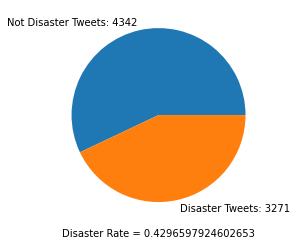

In [4]:
ax = plt.subplot()

n0 = train[train.target == 0].shape[0]
n1 = train[train.target == 1].shape[0]

ax.pie([n0, n1], labels = ('Not Disaster Tweets: ' + str(n0), 'Disaster Tweets: ' + str(n1)))

ax.set_xlabel('Disaster Rate = ' + str(n1 / (n0 + n1)))

plt.show()

### Keyword

Categorize the field `keyword`.

In [5]:
from sklearn.preprocessing import LabelEncoder

le_keyword = LabelEncoder()

le_keyword.fit(np.concatenate((np.array(train.keyword), np.array(test.keyword))))

train.keyword = le_keyword.transform(train.keyword) / len(le_keyword.classes_)
test.keyword = le_keyword.transform(test.keyword) / len(le_keyword.classes_)

### Location

Categorize the field `location`.

In [6]:
from sklearn.preprocessing import LabelEncoder

le_location = LabelEncoder()

le_location.fit(np.concatenate((np.array(train.location), np.array(test.location))).tolist())

train.location = le_location.transform(train.location) / len(le_location.classes_)
test.location = le_location.transform(test.location) / len(le_location.classes_)

### Links in Text

Now we extract links from the field `text` and try to figure out the pattern between the number of links and whether it is about disasters. 

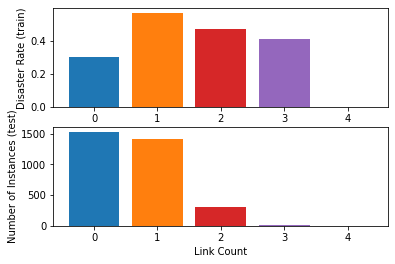

In [7]:
import re

def convert_links(data):
    if not 'link_count' in data.columns:
        for i in range(0, data.shape[0]):

            text = data.loc[i, 'text']

            urls = re.findall("https?:\/\/[a-zA-Z0-9\/\.]+", text)

            for url in urls:
                text = text.replace(url, '[link]')

            data.loc[i, 'link_count'] = len(urls)
            data.loc[i, 'text'] = text

convert_links(train)
convert_links(test)
            
fig, axes = plt.subplots(2)

for c in train.link_count.unique():

    axes[0].bar(c, train[(train.link_count == c) & (train.target == 1)].shape[0] / train[(train.link_count == c)].shape[0])

for c in test.link_count.unique():
    
    axes[1].bar(c, test[test.link_count == c].shape[0])
    
axes[1].set_xlabel('Link Count')

axes[0].set_ylabel('Disaster Rate (train)')
axes[1].set_ylabel('Number of Instances (test)')

plt.show()

### Ats in Text

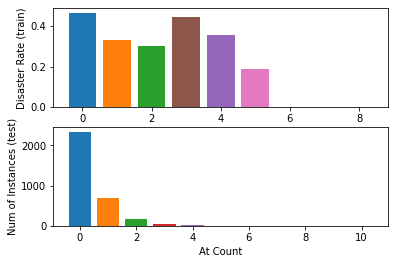

In [8]:
import re

def convert_ats(data):
    if not 'at_count' in data.columns:
        for i in range(0, data.shape[0]):

            text = data.loc[i, 'text']

            ats = re.findall("\@[^\s:]+", text)

            for at in ats:
                text = text.replace(at, '@xxx')

            data.loc[i, 'at_count'] = len(ats)
            data.loc[i, 'text'] = text

convert_ats(train)
convert_ats(test)

fig, axes = plt.subplots(2)

for c in train.at_count.unique():
   axes[0].bar(c, train[(train.at_count == c) & (train.target == 1)].shape[0] / train[(train.at_count == c)].shape[0])

for c in test.at_count.unique():
   axes[1].bar(c, test[test.at_count == c].shape[0])

axes[1].set_xlabel('At Count')

axes[0].set_ylabel('Disaster Rate (train)')
axes[1].set_ylabel('Num of Instances (test)')

plt.show()

### Tags in Text

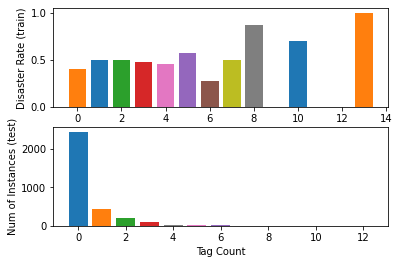

In [9]:
import re

def convert_tags(data):
    if not 'tag_count' in data.columns:
        for i in range(0, data.shape[0]):

            text = data.loc[i, 'text']

            tags = re.findall("\#[^\s:]+", text)

            for tag in tags:
                text = text.replace(tag, tag[1:])

            data.loc[i, 'tag_count'] = len(tags)
            data.loc[i, 'text'] = text

convert_tags(train)
convert_tags(test)

fig, axes = plt.subplots(2)

for c in train.tag_count.unique():
   axes[0].bar(c, train[(train.tag_count == c) & (train.target == 1)].shape[0] / train[(train.tag_count == c)].shape[0])

for c in test.tag_count.unique():
   axes[1].bar(c, test[(test.tag_count == c)].shape[0])

axes[1].set_xlabel('Tag Count')

axes[0].set_ylabel('Disaster Rate (train)')
axes[1].set_ylabel('Num of Instances (test)')

plt.show()

### Vectorize Text

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(train.text)
vectorizer.fit(test.text)

train_x = pd.concat([
    train[['keyword', 'location', 'link_count', 'at_count', 'tag_count']], 
    pd.DataFrame(vectorizer.transform(train.text).toarray())], axis = 1, sort=False)

test_x = pd.concat([
    test[['keyword', 'location', 'link_count', 'at_count', 'tag_count']], 
    pd.DataFrame(vectorizer.transform(test.text).toarray())], axis = 1, sort=False)

train_y = train.target

## Model Evaluate

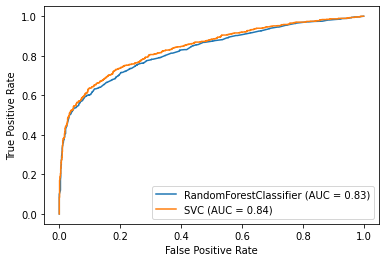

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

x1, x2, y1, y2 = train_test_split(train_x, train_y)

rfc = RandomForestClassifier()
svm = SVC()

rfc.fit(x1, y1)
svm.fit(x1, y1)

ax = plt.subplot()

plot_roc_curve(rfc, x2, y2, ax = ax)
plot_roc_curve(svm, x2, y2, ax = ax)

plt.show()

## SVM

In [12]:
svm = SVC()

svm.fit(train_x, train_y)

prediction = pd.DataFrame({ 'id': test.id, 'target': svm.predict(test_x) })

prediction

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


## Save Result

In [13]:
prediction.to_csv('./dataset/submission.csv', index = False)